# Download data

In [1]:
!git clone https://github.com/NTT123/viwik18.git

Cloning into 'viwik18'...
remote: Enumerating objects: 161, done.
remote: Total 161 (delta 0), reused 0 (delta 0), pack-reused 161 (from 1)
Receiving objects: 100% (161/161), 453.04 MiB | 19.78 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (13/13), done.


In [2]:
%cd /kaggle/working/viwik18

/kaggle/working/viwik18


In [3]:
!cat dataset/viwik18_* > viwik18.txt

# Import libraries

In [4]:
from gensim.models import Word2Vec
import gensim
import nltk
from nltk import word_tokenize
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing data

In [5]:
with open('/kaggle/working/viwik18/viwik18.txt', 'r') as f:
    data = f.read()

In [6]:
data[:100]

'trang chính  internet society  internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nh'

In [7]:
tokens = word_tokenize(data)
tokens[:20]

['trang',
 'chính',
 'internet',
 'society',
 'internet',
 'society',
 'hay',
 'isoc',
 'là',
 'một',
 'tổ',
 'chức',
 'quốc',
 'tế',
 'hoạt',
 'động',
 'phi',
 'lợi',
 'nhuận',
 'phi']

In [8]:
tokens = [tokens]
tokens[0][:20]

['trang',
 'chính',
 'internet',
 'society',
 'internet',
 'society',
 'hay',
 'isoc',
 'là',
 'một',
 'tổ',
 'chức',
 'quốc',
 'tế',
 'hoạt',
 'động',
 'phi',
 'lợi',
 'nhuận',
 'phi']

# Word2Vec model

In [9]:
# Create CBOW model
model1 = gensim.models.Word2Vec(tokens, min_count=1,
                                vector_size=100, window=5)

In [10]:
model1.save("word2vec.model")

In [11]:
model1.wv['trang']

array([-1.44685770e-03,  4.57585743e-03, -8.60078819e-03, -6.53875573e-03,
       -2.06504762e-03, -3.89011018e-03, -1.24132982e-03,  4.22266638e-03,
        5.72801381e-03, -1.48199098e-02, -1.36240786e-02, -6.75838301e-03,
       -4.89302585e-03,  3.63867846e-03, -8.72717053e-03, -3.95046500e-03,
        6.23013312e-03,  2.48141913e-03, -3.24741309e-03, -1.43490322e-02,
        5.48844552e-03,  1.64088719e-02, -8.97524599e-03,  3.20802093e-03,
       -9.02900659e-03,  9.00120754e-03, -1.22614428e-02, -1.65928602e-02,
        1.96551788e-03, -5.83893526e-03, -1.09522941e-03, -4.01135068e-03,
        3.29256547e-03, -3.81747005e-03, -7.65912607e-03, -4.00600675e-03,
       -5.33988327e-03,  8.13009124e-03, -1.15117505e-02, -1.17170904e-02,
        2.36521792e-05, -8.62128916e-04,  7.31306709e-03, -1.60957780e-02,
        2.48042983e-03, -4.92366869e-03, -6.61787856e-03, -1.55982701e-02,
       -5.91997569e-03, -2.65962025e-03,  1.23126491e-04, -1.35007352e-02,
        5.06723346e-03,  

In [12]:
model1.wv.most_similar('hay', topn=10)

[('có', 0.9749892950057983),
 ('như', 0.9741930365562439),
 ('được', 0.9737900495529175),
 ('nam', 0.9737685918807983),
 ('từ', 0.9737446308135986),
 ('california', 0.9735478758811951),
 ('các', 0.9731698036193848),
 ('và', 0.9728968143463135),
 ('việt', 0.9728813767433167),
 ('về', 0.9728386402130127)]

In [13]:
model1.wv.similarity('society', 'internet')

0.41397896

# Visualize embeddings

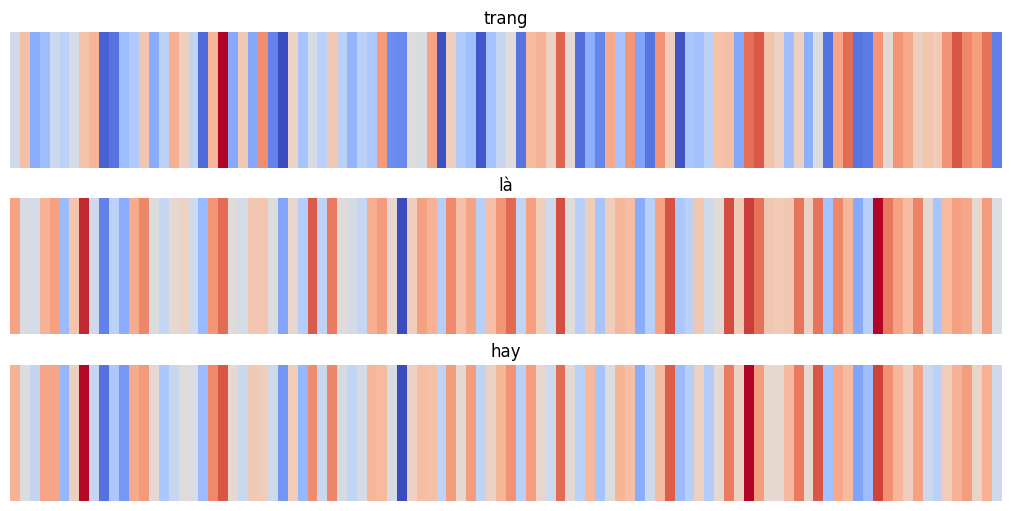

In [14]:
words = ['trang', 'là', 'hay']
vectors = np.array([model1.wv[word] for word in words])

scaled_vectors = (vectors - vectors.min()) / (vectors.max() - vectors.min())

fig, axs = plt.subplots(len(words), 1, figsize=(10, 5), constrained_layout=True)
for i, word in enumerate(words):
    cmap = plt.get_cmap('coolwarm')
    colors = cmap(scaled_vectors[i])
    axs[i].imshow([scaled_vectors[i]], aspect='auto', cmap=cmap)
    axs[i].set_title(word)
    axs[i].axis('off')

plt.show()